<a href="https://colab.research.google.com/github/rajpratap1411/task1sparks/blob/main/task1sparks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **The Sparks Founation-Data Science and Business Analyst**


### **Author:Raj Pratap Singh**
### **Task 1**
### **Prediction using Supervised Machine Learning**



simple linear regression

In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 

In [ ]:
csv_url= "http://bit.ly/w-data"
data=pd.read_csv(csv_url)

In [ ]:
print(data.shape)

(25, 2)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


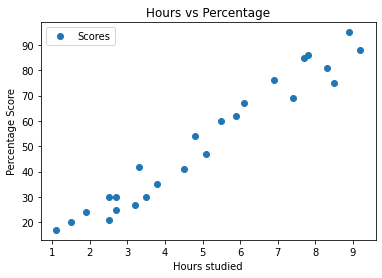

In [ ]:
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.show()

From above graph, we can clearly see that three is a positive linear relation between the number of hours studied and percentage of score

###**Preparing The Data**


In [ ]:
X=data['Hours'].values
Y=data['Scores'].values

In [ ]:
X

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8])

In [ ]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test= train_test_split(X,Y,test_size=0.2, random_state=0)

##**Training the algorithm**
we have split our data into training and testing sets,and now is finally the time to train our algorithm

In [ ]:
mx=np.mean(X_train)
my=np.mean(y_train)
n= len(X_train)

In [ ]:
mx

5.24

In [ ]:
my

53.95

In [ ]:
n

20

In [ ]:
a=0
b=0
for i in range(n):
  a+=(X_train[i]-mx)*(y_train[i]-my)
  b+=(X_train[i]-mx)**2
slope_line=a/b
slope_line

9.910656480642235

In [ ]:
c=my-(slope_line*mx)
print(slope_line,c)

9.910656480642235 2.0181600414346903


In [ ]:
maxx=np.max(X_train)+1
minx=np.min(X_train)-1

In [ ]:
x=np.linspace(minx,maxx,10)
y=c+slope_line*x

In [ ]:
x

array([ 0.1       ,  1.22222222,  2.34444444,  3.46666667,  4.58888889,
        5.71111111,  6.83333333,  7.95555556,  9.07777778, 10.2       ])

In [ ]:
y

array([  3.00922569,  14.13118463,  25.25314357,  36.37510251,
        47.49706145,  58.61902039,  69.74097933,  80.86293827,
        91.9848972 , 103.10685614])

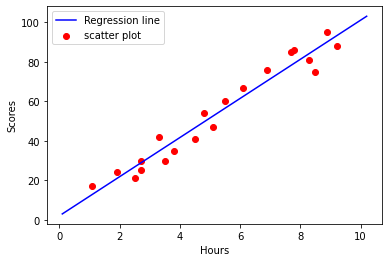

In [ ]:
plt.plot(x,y,color='blue',label='Regression line')
plt.scatter(X_train,y_train,c='red', label='scatter plot')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

##**Making Predictions**
Now that we have trained our algorithm,it's time to make some predictions


In [ ]:
print(x_test)
y_pred= c+(slope_line*x_test)

[1.5 3.2 7.4 2.5 5.9]


In [ ]:
df=pd.DataFrame({'actual':y_test, 'predicted':y_pred})
df

,actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
y_test

array([20, 27, 69, 30, 62])

In [ ]:
my=np.mean(y_test)

In [ ]:
sst=0
ssr=0
n=len(y_test)
for i in range(n):
  sst+=(y_pred[i]-my)**2
  ssr+=(y_test[i]-my)**2
  r2=sst/ssr
  print(r2)


1.3093139148793211
0.9897822935444739
1.2669251472918082
1.2980530816663265
1.2055199541753725


In [ ]:
x1=9.125
y_ans=c+(slope_line*9.25)
print("No. of hours = {}".format(x1))
print("predicted score= {}".format(y_ans))

No. of hours = 9.125
predicted score= 93.69173248737536


##**Evaluating the model**
the final step is to evaluate the performance of algorithm. This step is particularly important to compare how cell different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrices.

In [ ]:
from sklearn import metrics
print('mean absolute error: ',metrics.mean_absolute_error(y_test, y_pred))

mean absolute error:  4.1838598990029725
